# CA4015 Advanced Machine Learning - Assignment 1: Diabetes Classification

This assignment involves the Diabetes dataset found [here](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download). The objective is to predict the "Outcome" variable using two approaches.

1. Random Forests in scikit-learn
2. AutoML with PyCaret

This Notebook will be broken down into a number of sections:

* [Importing Libraries and packages](#lib)
* [Domain Exploration](#domain)
* [Dataset Overview](#data)
* [Exploratory Data Analysis](#eda)
* [Data Processing](#proc)
* [Classification using Random Forests](#rf)
* [Classification using AutoML](#automl)

## Importing Libraries and Packages <a class="anchor" id="lib"></a>

In [45]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline

## Dataset Overview <a class="anchor" id="data"></a>

In [89]:
pwd #C:\\Users\\Diarmuid\\Documents\\dcu\\final-year\\ca4015\\Assignments\\ca4015_a1_diabetes

'C:\\Users\\Diarmuid\\Documents\\dcu\\final-year\\ca4015\\Assignments\\ca4015_a1_diabetes'

In [90]:
df = pd.read_csv('data/diabetes.csv')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [84]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: years
* Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

## Domain Exploration <a class="anchor" id="domain"></a>

### Diabetes
"Diabetes is a chronic (long-lasting) health condition that affects how your body turns food into energy.

Your body breaks down most of the food you eat into sugar (glucose) and releases it into your bloodstream. When your blood sugar goes up, it signals your pancreas to release insulin. Insulin acts like a key to let the blood sugar into your body’s cells for use as energy.

With diabetes, your body doesn’t make enough insulin or can’t use it as well as it should. When there isn’t enough insulin or cells stop responding to insulin, too much blood sugar stays in your bloodstream. Over time, that can cause serious health problems, such as heart disease, vision loss, and kidney disease." [Source: CDC](https://www.cdc.gov/diabetes/basics/diabetes.html#:~:text=With%20diabetes%2C%20your%20body%20either,releases%20it%20into%20your%20bloodstream.)

### Gestational Diabetes
"Gestational diabetes occurs when your body can’t make enough insulin during your pregnancy. Insulin is a hormone made by your pancreas that acts like a key to let blood sugar into the cells in your body for use as energy.

During pregnancy, your body makes more hormones and goes through other changes, such as weight gain. These changes cause your body’s cells to use insu)lin less effectively, a condition called insulin resistance. Insulin resistance increases your body’s need for insulin.

All pregnant women have some insulin resistance during late pregnancy. However, some women have insulin resistance even before they get pregnant. They start pregnancy with an increased need for insulin and are more likely to have gestational diabetes." [Source: CDC](https://www.cdc.gov/diabetes/basics/gestational.html#:~:text=Insulin%20resistance%20increases%20your%20body's,likely%20to%20have%20gestational%20diabetes.)

### Glucose levels
"A low blood sugar level is uncommon in people who do not have diabetes." [Source: NHS](https://www.nhs.uk/conditions/low-blood-sugar-hypoglycaemia/)

### Fasting Blood Sugar Test
"This measures your blood sugar after an overnight fast (not eating). A fasting blood sugar level of 99 mg/dL or lower is normal, 100 to 125 mg/dL indicates you have prediabetes, and 126 mg/dL or higher indicates you have diabetes." [Source: CDC](https://www.cdc.gov/diabetes/basics/getting-tested.html#:~:text=A%20fasting%20blood%20sugar%20level,higher%20indicates%20you%20have%20diabetes.)

### Blood Pressure Range - Normal vs. Diabetic
"A normal blood pressure level is less than 120/80 mmHg.1" [Source: CDC](https://www.cdc.gov/bloodpressure/about.htm#:~:text=A%20normal%20blood%20pressure%20level%20is%20less%20than%20120%2F80%20mmHg.&text=No%20matter%20your%20age%2C%20you,pressure%20in%20a%20healthy%20range.)

"Readings vary, but most people with diabetes should have a blood pressure of no more than 130/80." [Source: WebMD](https://www.webmd.com/diabetes/high-blood-pressure)

### Diastolic Blood Pressure (DBP)
"Extremely low or zero DBP is a possibility in cases of severe hypotension, stiff arteries in elderly, diabetes, arteriovenous malformation, and aortic dissection." [Source: IAForum](https://www.theiaforum.org/article.asp?issn=2589-7934;year=2016;volume=17;issue=1;spage=32;epage=33;aulast=Choudhary#:~:text=Extremely%20low%20or%20zero%20DBP,arteriovenous%20malformation%2C%20and%20aortic%20dissection.)

### Tricep Skin Thickness
"This study concluded that progression of diabetes alters skin fold thickness which has positive
correlation with blood pressure . Inspite of having many anthropometric parameters to associate cardiovascular
risk in diabetes , skin fold thickness may be used as routine parameter in clinical practise to manage
cardiovascular disease in diabetic patients .Because skin fold thickness method is a non invasive method , a
direct measurement of subcutaneous layer of fat, which may provide direct effect of insulin on lipid metabolism" [Source: IOSR Journal](https://www.iosrjournals.org/iosr-jdms/papers/Vol15-Issue%2011/Version-9/C1511090711.pdf)

### Insulin levels
"So a fasting insulin level should never be 0, which it might be in a person with untreated Type 1. It shouldn’t go below 3. But a high insulin level is just as problematic. A high insulin level is a sign of insulin resistance or prediabetes. It can also signify early-stage Type 2." [Source: Diabetes Self-Management](https://www.diabetesselfmanagement.com/blog/do-you-know-your-insulin-level/)

When investigating a 2-hour serum insulin (mu U/ml), I found one [paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3136064/) but I am unsure whether the units map to the units used here. In the study, the averages 18 and 69 found in control and case groups respectively and much lower than the levels found in the Insulin column.

### BMI
"patients with higher BMI are at higher risk for having diabetes mellitus" [Source: NCBI](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1890993/)

### Diabetes Pedigree Function
"Diabetes Pedigree Function: indicates the function which scores likelihood of diabetes based on family history." [Source: Analytics Vidhya](https://analyticsvidhya.com/blog/2021/07/diabetes-prediction-with-pycaret/)

### Age
"The risk for diabetes increases with age, making diabetes common in older adults." [Source: EndocrineWeb](https://www.endocrineweb.com/guides/diabetes-older-people/risk-rises-age)

## Exploratory Data Analysis <a class="anchor" id="eda"></a>

In [9]:
report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [50]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [85]:
# Creating binary columns to split the five variables into zero and non-zero to inspect the differences on Outcome
# False is non-zero
# True is zero
df = df.eval('HasInsulin = Insulin == 0')
df = df.eval('HasBP = BloodPressure == 0')
df = df.eval('HasGlucose = Glucose == 0')
df = df.eval('HasBMI = BMI == 0')
df = df.eval('HasSkinThickness = SkinThickness == 0')

False    0.513021
True     0.486979
Name: HasInsulin, dtype: float64


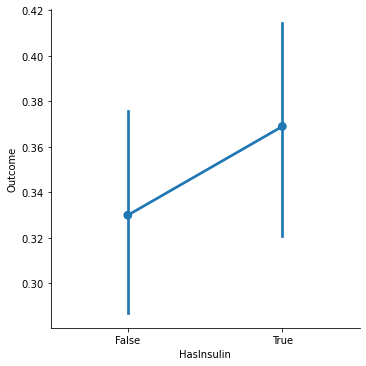

False    0.954427
True     0.045573
Name: HasBP, dtype: float64


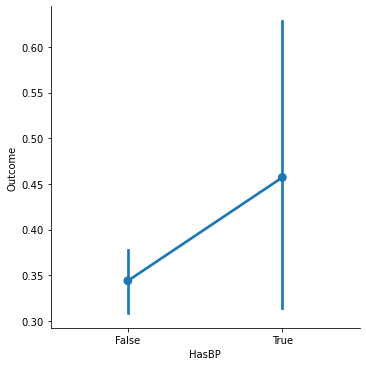

False    0.99349
True     0.00651
Name: HasGlucose, dtype: float64


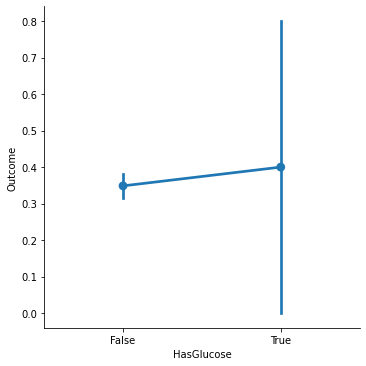

False    0.985677
True     0.014323
Name: HasBMI, dtype: float64


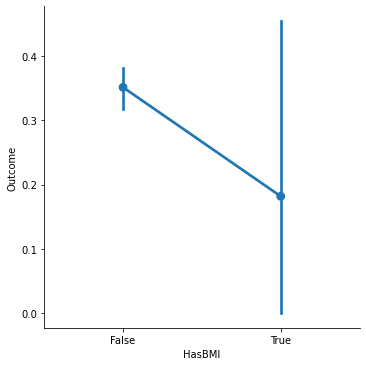

False    0.704427
True     0.295573
Name: HasSkinThickness, dtype: float64


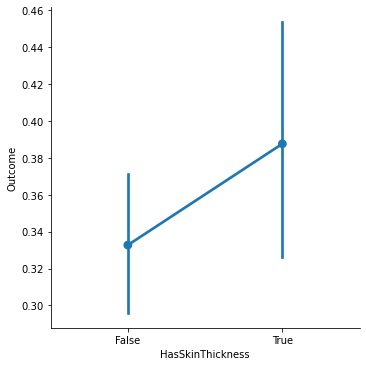

In [41]:
for col in ['HasInsulin', 'HasBP', 'HasGlucose', 'HasBMI', 'HasSkinThickness']:
    # This shows the proportion for zero and non-zero in each category
    print(df[col].value_counts(normalize=True))
    sns.catplot(data=df, x=col, y='Outcome', kind='point')
    plt.show()

### EDA Evaluation

- From EDA, glucose is most correlated with Outcome, BMI and Age show the highest correlation after. The other variables do not show much correlation.

- The presence of zeroes in Glucose, BloodPressure, SkinThickness, Insulin and BMI appear to be outliers due to how they clash with the overall distribution.

- Having a Glucose level, SkinThickness and BMI of 0 seems impossible, however I'm unsure if it is possible to have an Insulin and BloodPressure level of 0 due to the domain exploration above

- There are no significant differences in Outcome between zero and non-zero values who have levels equal to zero and those who don't.

- If we drop the 0 values (outliers), we will lose nearly 50% of the data due to Insulin and 30% of the data due to SkinThickness.

- Instead we will replace them with the mean to maintain the size of the dataset.

## Data Processing <a class="anchor" id="proc"></a>

In [42]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'HasInsulin',
       'HasBP', 'HasGlucose', 'HasBMI', 'HasSkinThickness'],
      dtype='object')

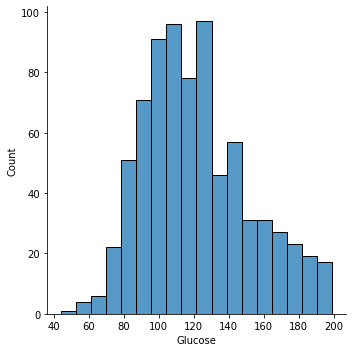

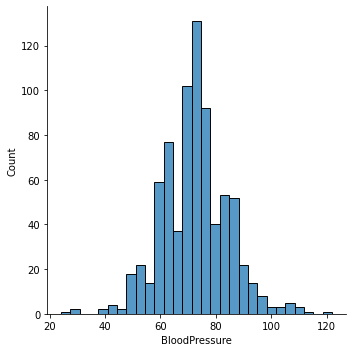

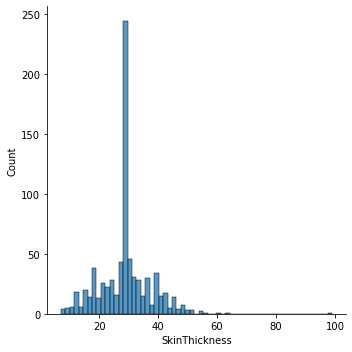

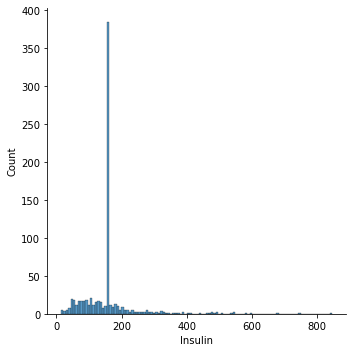

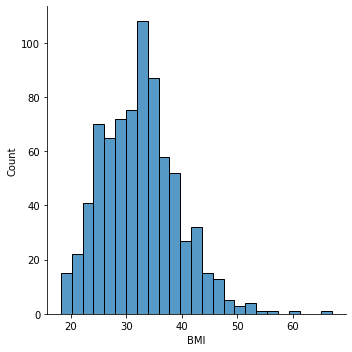

In [91]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols:
    mean = df.loc[df[col] > 0, col].mean()
    df[col] = np.where(df[col] == 0, mean, df[col])
    sns.displot(data=df, x=col, kind='hist')

- SkinThickness and Insulin are highly right skewed. Let's explore there top values

In [96]:
[df['SkinThickness'].sort_values(ascending=False)[:5], df['Insulin'].sort_values(ascending=False)[:5]]

[579    99.0
 445    63.0
 57     60.0
 120    56.0
 211    54.0
 Name: SkinThickness, dtype: float64,
 13     846.0
 228    744.0
 247    680.0
 584    600.0
 409    579.0
 Name: Insulin, dtype: float64]

<AxesSubplot:xlabel='SkinThickness'>

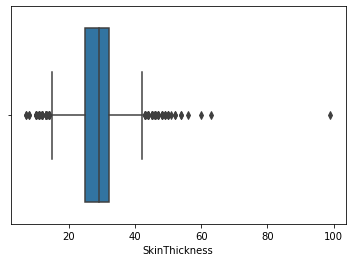

In [97]:
sns.boxplot(data=df, x='SkinThickness')

<AxesSubplot:xlabel='Insulin'>

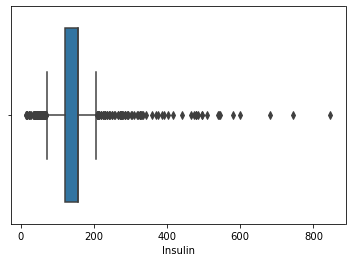

In [98]:
sns.boxplot(data=df, x='Insulin')

SkinThickness of 99mm is incredibly large and is very far from the rest of the group but let's inspect this case to determine whether they are extreme values or outliers

In [99]:
df.loc[df['SkinThickness'] > 70]

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
579            2    197.0           70.0           99.0  155.548223  34.7   

     DiabetesPedigreeFunction  Age  Outcome  
579                     0.575   62        1

Insulin appears to have quite extreme values but they may not be outliers

In [100]:
df.loc[df['Insulin'] > 650]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
13             1    189.0           60.0           23.0    846.0  30.1   
228            4    197.0           70.0           39.0    744.0  36.7   
247            0    165.0           90.0           33.0    680.0  52.3   

     DiabetesPedigreeFunction  Age  Outcome  
13                      0.398   59        1  
228                     2.329   31        0  
247                     0.427   23        0

For now I will leave these columns as they are.

## Classification using Random Forests <a class="anchor" id="rf"></a>

## Classification using AutoML <a class="anchor" id="automl"></a>